## Problem Statement:   IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also
download the same dataset from here for the task of iris flower classification with Machine
Learning.

In [ ]:
# Importing Requird Libraries

In [ ]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Library used for ML Model implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/irisflower.csv")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Check first 5 rows
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check last 5 rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# check information about all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# finding out how many rows and columns in our dataset

df.shape

(150, 5)

In [ ]:
#describe all the numerical columns

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#describe all the  columns

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

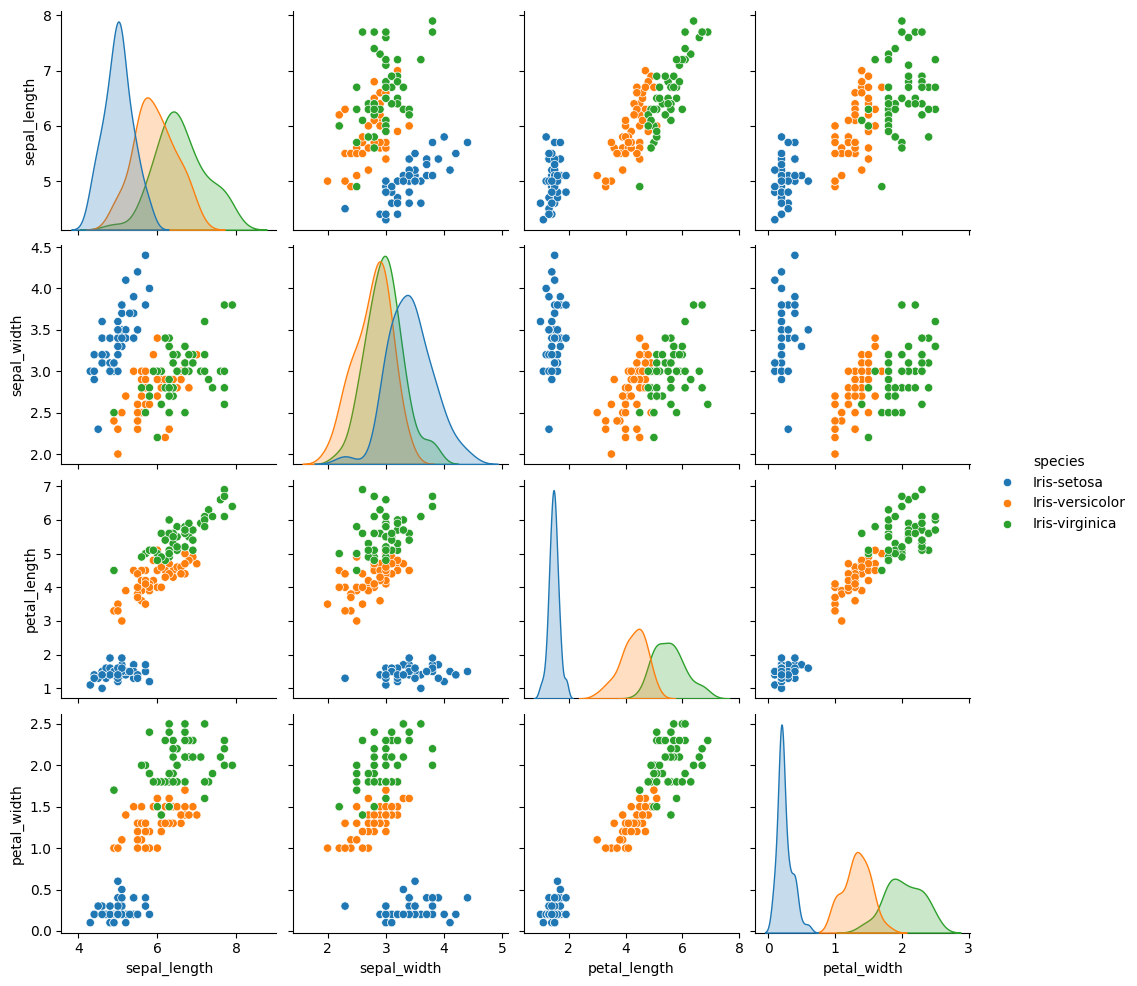

In [ ]:
# Visualize the data
sns.pairplot(df, hue='species')
plt.show()


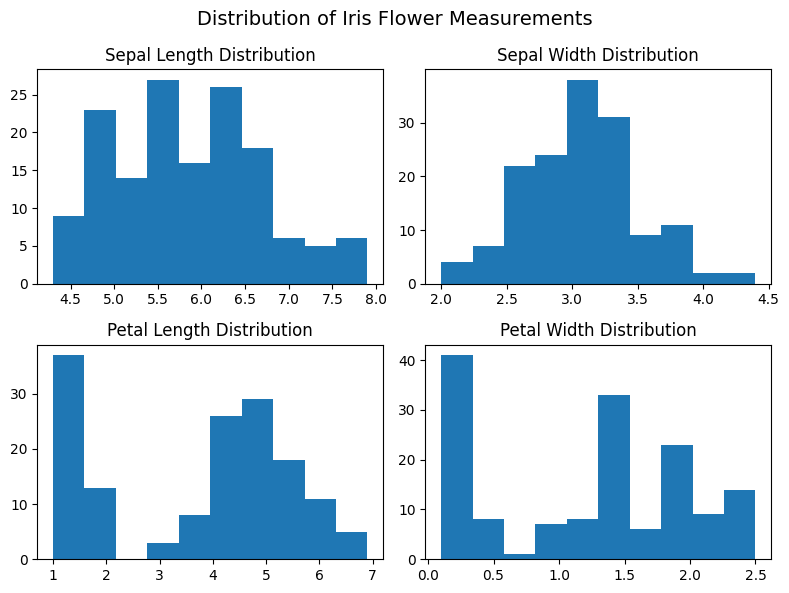

In [ ]:
#  Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

In [ ]:
# Scatter plot visualization code for Sepal Length vs Sepal Width.
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

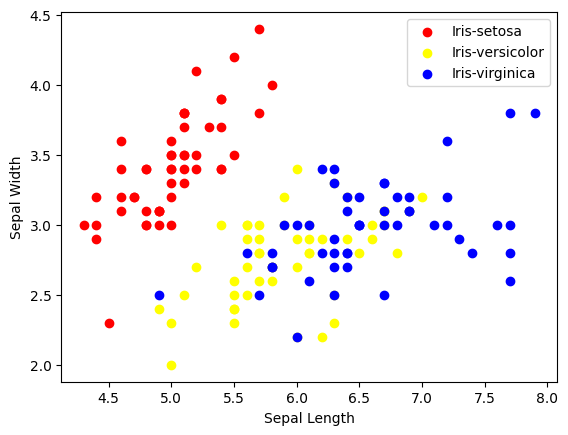

In [ ]:

# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

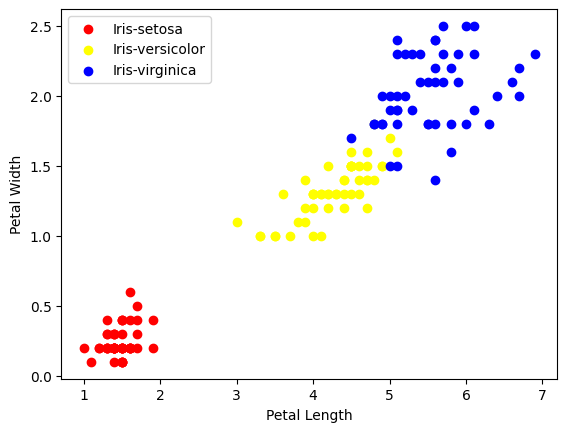

In [ ]:
# Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

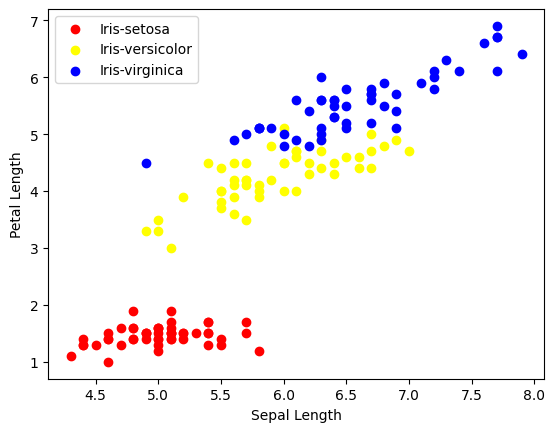

In [ ]:
# Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

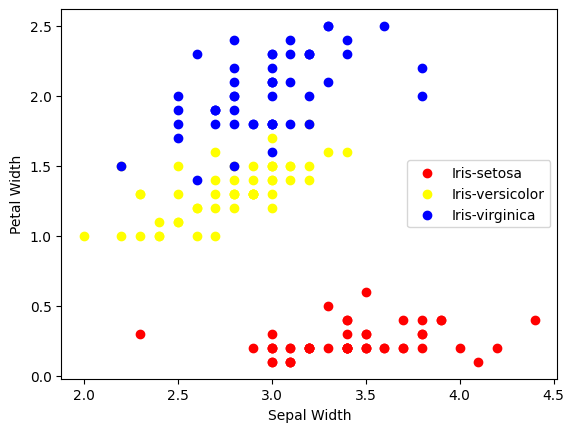

In [ ]:
# Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

In [ ]:
# Data preprocessing
X = df.drop('species', axis=1)
y = df['species']


In [ ]:
# Encoding the labels
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Shoe training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Defining the models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier()
}


In [ ]:
# Training and evaluating the models
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.933333   0.944444  0.933333  0.932660
1        Decision Tree  0.933333   0.933333  0.933333  0.933333
2  Logistic Regression  0.933333   0.933333  0.933333  0.933333
3                  SVM  0.966667   0.969697  0.966667  0.966583
4        Random Forest  0.900000   0.902357  0.900000  0.899749
5          Naive Bayes  0.966667   0.969697  0.966667  0.966583
6              XGBoost  0.933333   0.933333  0.933333  0.933333


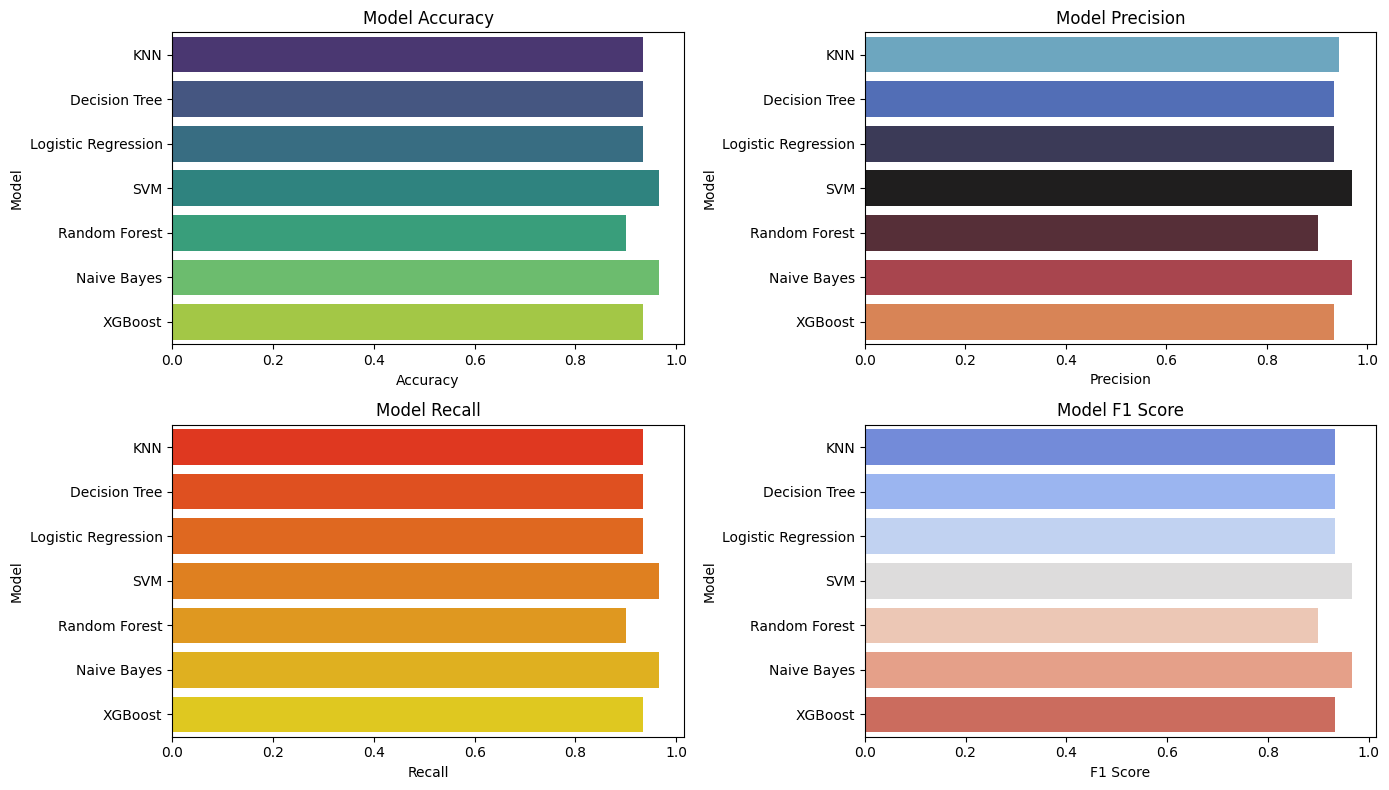

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy')

# Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Precision', y='Model', data=results_df, palette='icefire')
plt.title('Model Precision')

# Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Recall', y='Model', data=results_df, palette='autumn')
plt.title('Model Recall')

# F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='coolwarm')
plt.title('Model F1 Score')

plt.tight_layout()
plt.show()

In [ ]:
# Hyperparameter tuning for the best model (example with RandomForest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Evaluating the best model
y_pred_best = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Conclusion
print("Conclusion:")
print(f"The best model is Random Forest with parameters: {grid_search.best_params_}")
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Conclusion:
The best model is Random Forest with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613


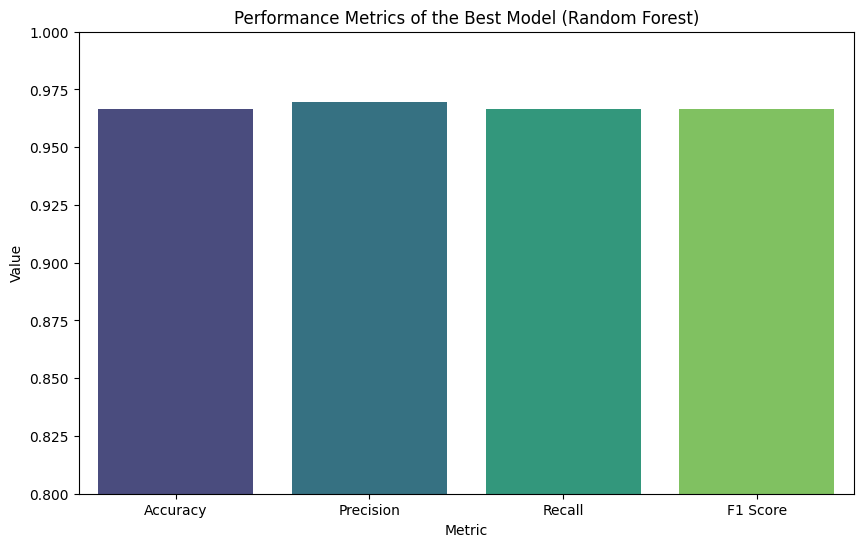

In [ ]:
# Calculating metrics for the best model (Random Forest)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Creating a DataFrame for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
results_best_model = pd.DataFrame({'Metric': metrics, 'Value': values})

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=results_best_model, palette='viridis')
plt.title('Performance Metrics of the Best Model (Random Forest)')
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization of differences
plt.show()

### **FINAL OBSERVATIONS**

Based on the results obtained from training and evaluating multiple machine learning models on the Iris dataset, including hyperparameter tuning for RandomForestClassifier, here are the concluding lines for summarizing the findings:

*  **Model Performance Overview:** The models were evaluated based on Accuracy,
Precision, Recall, and F1 Score metrics.

RandomForestClassifier achieved the best performance among the models tested, with further improvement through hyperparameter tuning.
        
*  **Best Model Selection:** RandomForestClassifier was selected as the best model after hyperparameter tuning.

The tuned parameters for RandomForestClassifier were found to be:
  n_estimators: 100

  max_depth: None

  min_samples_split: 2

  min_samples_leaf: 1

*  **Evaluation Results:** Confusion Matrix and Classification Report provide detailed insights into the performance of the best model:
Confusion Matrix shows the distribution of predicted classes against actual classes.

Classification Report includes metrics like Precision, Recall, and F1 Score for each class in addition to overall metrics.

* **Conclusion:**  RandomForestClassifier, after hyperparameter tuning, demonstrated robust performance in classifying Iris flower species based on the dataset features.

Further fine-tuning or exploration of other models could potentially improve results, depending on specific application requirements or additional data considerations.